# [Predicting the Risk of Diabetes at Early Stage Using Machine Learning](http://)

Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past three decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025. 

![](https://northmemorial.com/wp-content/uploads/2016/10/Diabetes-illustration.png)

> About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.6 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades. 

![](https://everydaydiabetes.com/wp-content/uploads/Diabetes-Statistics-Worldwide-Everyday-Diabetes.jpg)

# Import libraries

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.graph_objects as go
import plotly.io as pio
import pickle


## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Feature selection
from sklearn.feature_selection import SelectFromModel
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"

# Import and clean data

In [2]:
df = pd.read_csv("diabetes_data.csv") 

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# [Size of Dataset](http://)
> Our data  contains the sign and symptom data of newly diabetic or would be diabetic patient and have 520 rows and 17 columns.

In [4]:
print("Number of Instances and Attributes:", df.shape)

Number of Instances and Attributes: (520, 17)


# [Attribute Information:]()

* **Age**: 20-65
* **Sex**: Male, Female ( 1 , 0 )
* **Polyuria**: Yes, No ( 1 , 0 )
* **Polydipsia**: Yes, No ( 1 , 0 )
* **sudden weight loss**: Yes, No ( 1 , 0 )
* **weakness**: Yes, No ( 1 , 0 )
* **Polyphagia**: Yes, No ( 1 , 0 )
* **Genital thrush**: Yes, No ( 1 , 0 )
* **visual blurring**: Yes, No ( 1 , 0 )
* **Itching**: Yes, No ( 1 , 0 )
* **Irritability**: Yes, No ( 1 , 0 )
* **delayed healing**: Yes, No ( 1 , 0 )
* **partial paresis**: Yes, No ( 1 , 0 )
* **muscle stiness**: Yes, No ( 1 , 0 )
* **Alopecia**: Yes, No ( 1 , 0 )
* **Obesity**: Yes, No ( 1 , 0 )
* **Class**: 1.Positive, 2.Negative.



In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

# [Data type of each columns](http://)

In [6]:
print(df.dtypes)

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


# [Checking for NaN Values](http://)

In [7]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# [Data Analysis](http://)



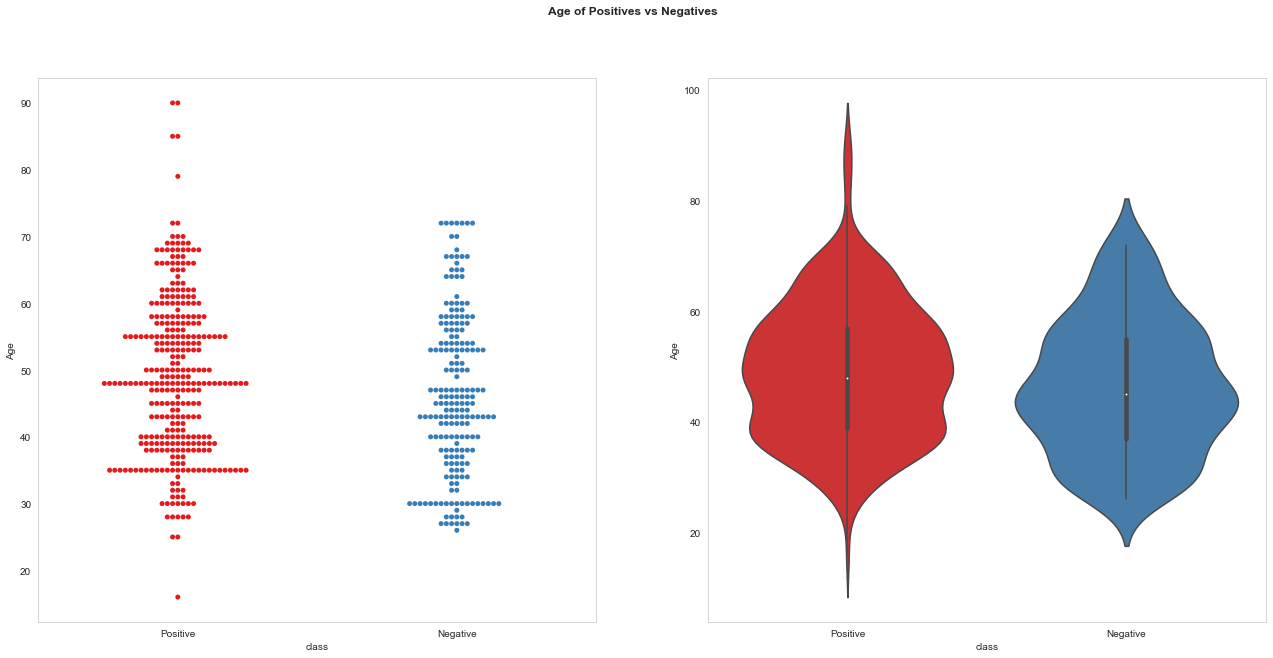

In [9]:
f,ax=plt.subplots(1,2,figsize=(22,10))
#sns.stripplot(x="class", y="Age", data=df, jitter=True, palette="Set1", ax=ax[0])

sns.swarmplot(x="class", y="Age",data=df, palette="Set1", ax=ax[0])
sns.violinplot(x="class", y="Age", data=df, palette="Set1", ax=ax[1])
f.suptitle('Age of Positives vs Negatives', fontweight="bold");



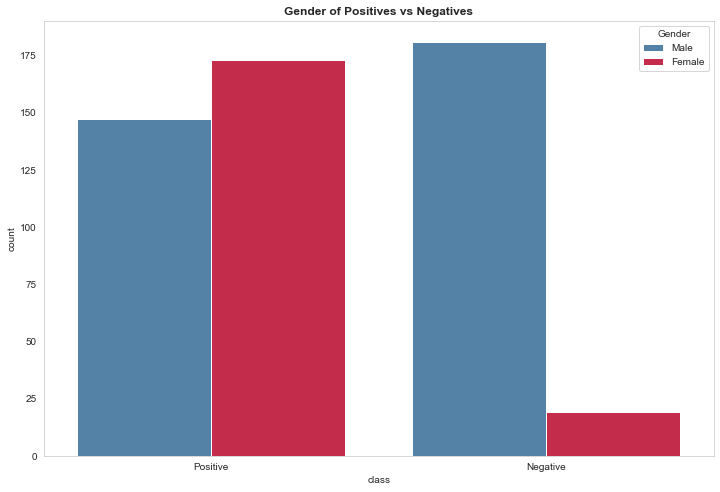

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="class", hue="Gender", palette=['STEELBLUE','crimson'],data=df);
plt.title('Gender of Positives vs Negatives',fontweight="bold");

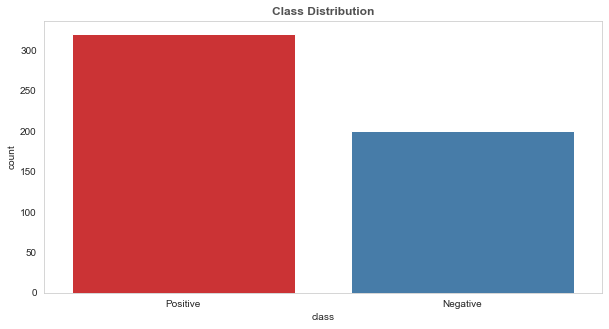

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['class'], palette='Set1');
plt.title('Class Distribution',fontweight="bold",alpha=0.8);

In [12]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


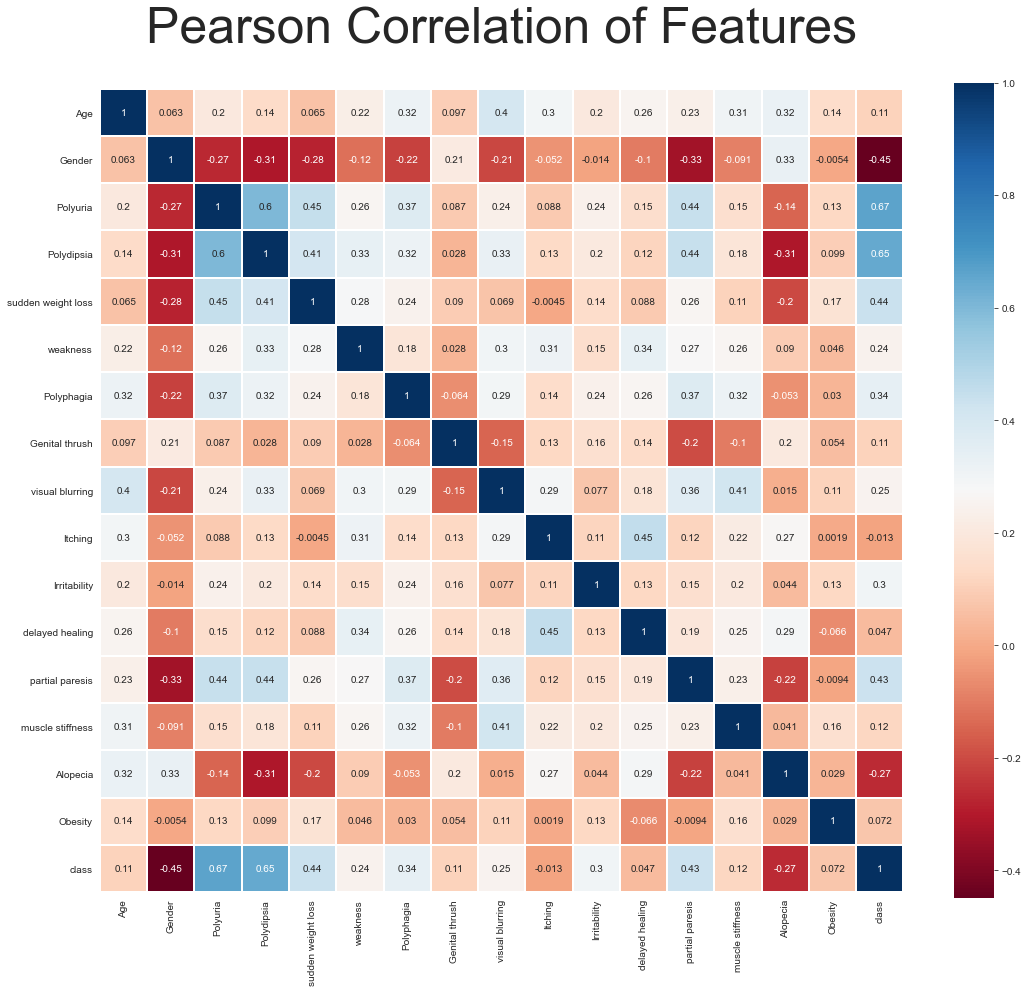

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15));
plt.title('Pearson Correlation of Features', y=1.05, size=50);
sns.heatmap(df.corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [14]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [15]:
df.drop(columns=['partial paresis'],inplace=True)

In [16]:
df.to_csv('diabetes_clean.csv',index=False)

In [17]:
# Everything except target variable
X = df.drop("class", axis=1)

# Target variable
y = df['class'].values

# Prune features using decision tree

In [18]:
#Prune features using decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [19]:
pickle.dump(clf, open('decision_tree.pkl', 'wb'))

<AxesSubplot:>

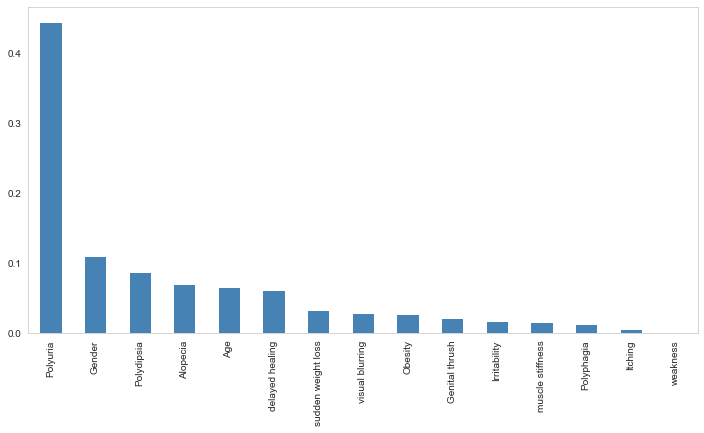

In [20]:
# Use the fitted model to generate a graph of feature importance
pd.Series(clf.feature_importances_, index=df.columns[:len(df.columns)-1]).sort_values(ascending=False).plot.bar(color='steelblue', figsize=(12, 6))

In [21]:
from sklearn.feature_selection import RFECV

clf = DecisionTreeClassifier()
trans = RFECV(clf)
X_trans = trans.fit_transform(X, y)
columns_retained_RFECV = df.iloc[:, :-1].columns[trans.get_support()].values
columns_retained_RFECV

array(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'visual blurring', 'Irritability', 'delayed healing', 'Alopecia',
       'Obesity'], dtype=object)

In [22]:
X_trans

array([[40,  1,  0, ...,  1,  1,  1],
       [58,  1,  0, ...,  0,  1,  0],
       [41,  1,  1, ...,  1,  1,  0],
       ...,
       [58,  0,  1, ...,  0,  0,  1],
       [32,  0,  0, ...,  1,  1,  0],
       [42,  1,  0, ...,  0,  0,  0]], dtype=int64)

# Split data into training / test sets

In [23]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X_trans, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

# Compare 3 potential models

In [24]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000), 
          "Random Forest": RandomForestClassifier()}

In [25]:
# define method to fit multiple models
def multi_fit(models, X_train, y_train):
    # Random seed for reproducible results
    np.random.seed(42)
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

In [26]:
# fit all 3 models
model_metrics = multi_fit(models=models,
                          X_train=X_train,
                          y_train=y_train)

In [27]:
# Create function to generate cross validated metrics for multiple models
def cross_validated_metrics(models, X,  y):
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores totals
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # make a list to hold collected scores for each model
        collected_scores = {}
        # gather mean of cross validated score for a variety of metrics
        for metric in ['accuracy', 'precision', 'recall']:
            collected_scores[metric] = np.mean(cross_val_score(model,
                                                               X,
                                                               y,
                                                               cv=5, # 5-fold cross-validation
                                                               scoring=metric)) # loop through scoring methods
        model_scores[name] = collected_scores
    return model_scores

In [28]:
model_metrics = cross_validated_metrics(models=models,
                                       X=X_trans,
                                       y=y)
model_metrics

{'KNN': {'accuracy': 0.8769230769230768,
  'precision': 0.9436375310376157,
  'recall': 0.85},
 'Logistic Regression': {'accuracy': 0.9173076923076924,
  'precision': 0.9335370706080088,
  'recall': 0.934375},
 'Random Forest': {'accuracy': 0.9692307692307693,
  'precision': 0.9674275680421422,
  'recall': 0.9875}}

#### Seperate. using random forest test to verify results are the same

In [29]:
# Fit model and get baseline score
np.random.seed(42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# cross validated accuracy score for random forest
cv_acc_rf = np.mean(cross_val_score(rf,
                                       X_trans,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="accuracy")) # precision as scoring
cv_acc_rf

0.9711538461538461

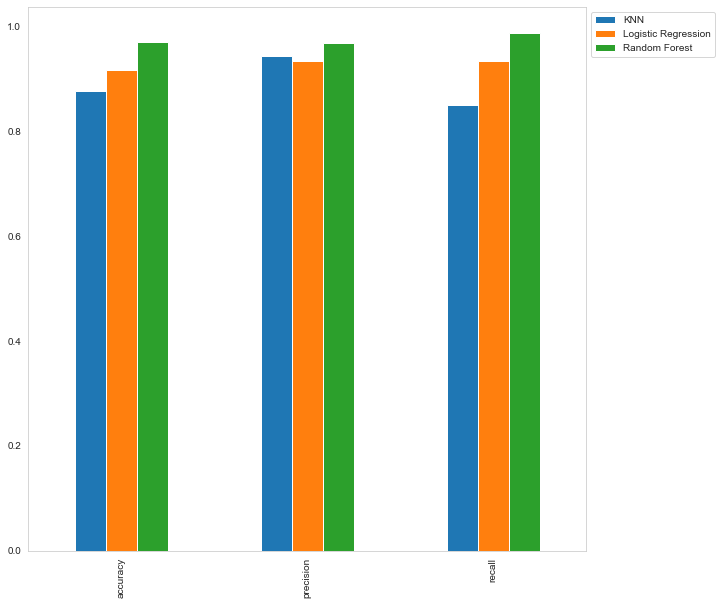

In [30]:
compare_metrics = pd.DataFrame(model_metrics)

compare_metrics.plot.bar(figsize=(10, 10)).legend(bbox_to_anchor=(1,1));

In [31]:
df_new = pd.read_csv("diabetes_clean.csv") # 'df' is short for 'DataFrame'

In [32]:
df_new.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# Attempt to tune hyperparameters
First try for logistic regression, then for randomforest

### Attempt to tune hyperparameters on random forest

In [33]:
# Fit model and get baseline score
rf = RandomForestClassifier()
np.random.seed(42)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               n_iter = 1, cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [36]:
best = rf_random.best_params_
best

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [37]:
rf_random.score(X_test, y_test)

0.9615384615384616

In [38]:
newmodels = {"Logistic Regression": models["Logistic Regression"],
             "Random Forest": models["Random Forest"], 
            "RS trained RF" : rf_random}

In [39]:
model_metrics = cross_validated_metrics(models=newmodels,
                                       X=X_trans,
                                       y=y)
model_metrics

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'Logistic Regression': {'accuracy': 0.9173076923076924,
  'precision': 0.9335370706080088,
  'recall': 0.934375},
 'Random Forest': {'accuracy': 0.9692307692307693,
  'precision': 0.9674275680421422,
  'recall': 0.9875},
 'RS trained RF': {'accuracy': 0.9557692307692307,
  'precision': 0.9607079195314491,
  'recall': 0.971875}}

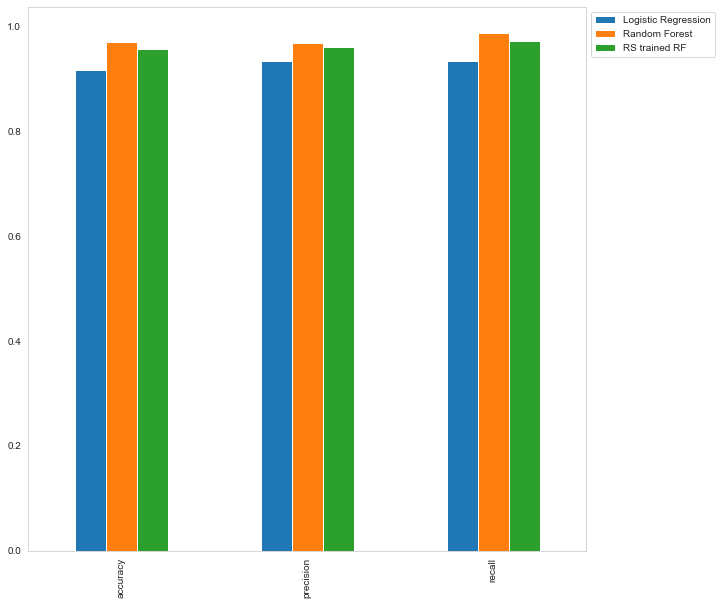

In [40]:
compare_new_metrics = pd.DataFrame(model_metrics)

compare_new_metrics.plot.bar(figsize=(10, 10)).legend(bbox_to_anchor=(1,1));

# Export the trained model to pickle

In [41]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))